In [1]:
import matplotlib.pyplot as plt
import numpy as np
import config_data
import train
import data
import evaluate_thresholds
import pattern_functions
np.random.seed(123)

In [2]:
dataset_info = config_data.chosen_dataset
X_train, X_test, y_train, y_test = data.get_train_test_data(dataset_info)
clf = train.train_lr(dataset_info)
all_data = train.get_predictions(clf, X_test, y_test)
all_data

Score: 0.785


,month,credit_amount,investment_as_income_percentage,sex,residence_since,age,number_of_credits,people_liable_for,sex-age,status_A11,...,skill_level_A171,skill_level_A172,skill_level_A173,skill_level_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202,Y,p
131,1.313345,1.367514,0.925988,1,0.141067,1,-0.707085,-0.422141,1,1,...,0,0,1,0,0,1,1,0,0,0.151828
203,-0.731766,-0.847057,0.925988,1,1.043899,0,-0.707085,-0.422141,0,1,...,0,0,1,0,1,0,1,0,0,0.653444
50,0.290789,-0.317558,0.925988,1,-0.761764,1,-0.707085,-0.422141,1,0,...,0,1,0,0,1,0,1,0,1,0.563433
585,-0.220489,-0.426344,-1.767795,0,1.043899,0,-0.707085,-0.422141,0,1,...,0,0,1,0,1,0,1,0,0,0.244944
138,-0.476127,-0.171400,0.925988,1,-0.761764,1,2.752659,-0.422141,1,0,...,0,0,1,0,0,1,1,0,1,0.941179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.802067,0.237102,-0.869867,1,-1.664596,0,-0.707085,-0.422141,0,0,...,0,0,1,0,1,0,1,0,1,0.381368
177,-1.243044,-1.055749,0.925988,1,1.043899,1,1.022787,-0.422141,1,1,...,0,0,1,0,1,0,1,0,1,0.899247
657,2.335900,2.601531,0.925988,1,0.141067,1,-0.707085,-0.422141,1,0,...,0,0,1,0,0,1,1,0,1,0.807108
210,-0.987405,-0.043373,-1.767795,1,-0.761764,1,1.022787,2.368875,1,0,...,0,0,1,0,1,0,1,0,1,0.990419


In [3]:
# measure the decision maker utility and the fairness for all decision rules (i.e., threshold combinations) and for all groups. This might take a few minutes.
U_DM, U_DS_A0, U_DS_A1, FS = evaluate_thresholds.evaluate_model(all_data)
points = np.array(list(zip(FS, U_DM)))
# derive points that form the pareto front
pareto_front_indices = evaluate_thresholds.is_pareto_efficient(points, False)
pareto_front_size = len(pareto_front_indices)

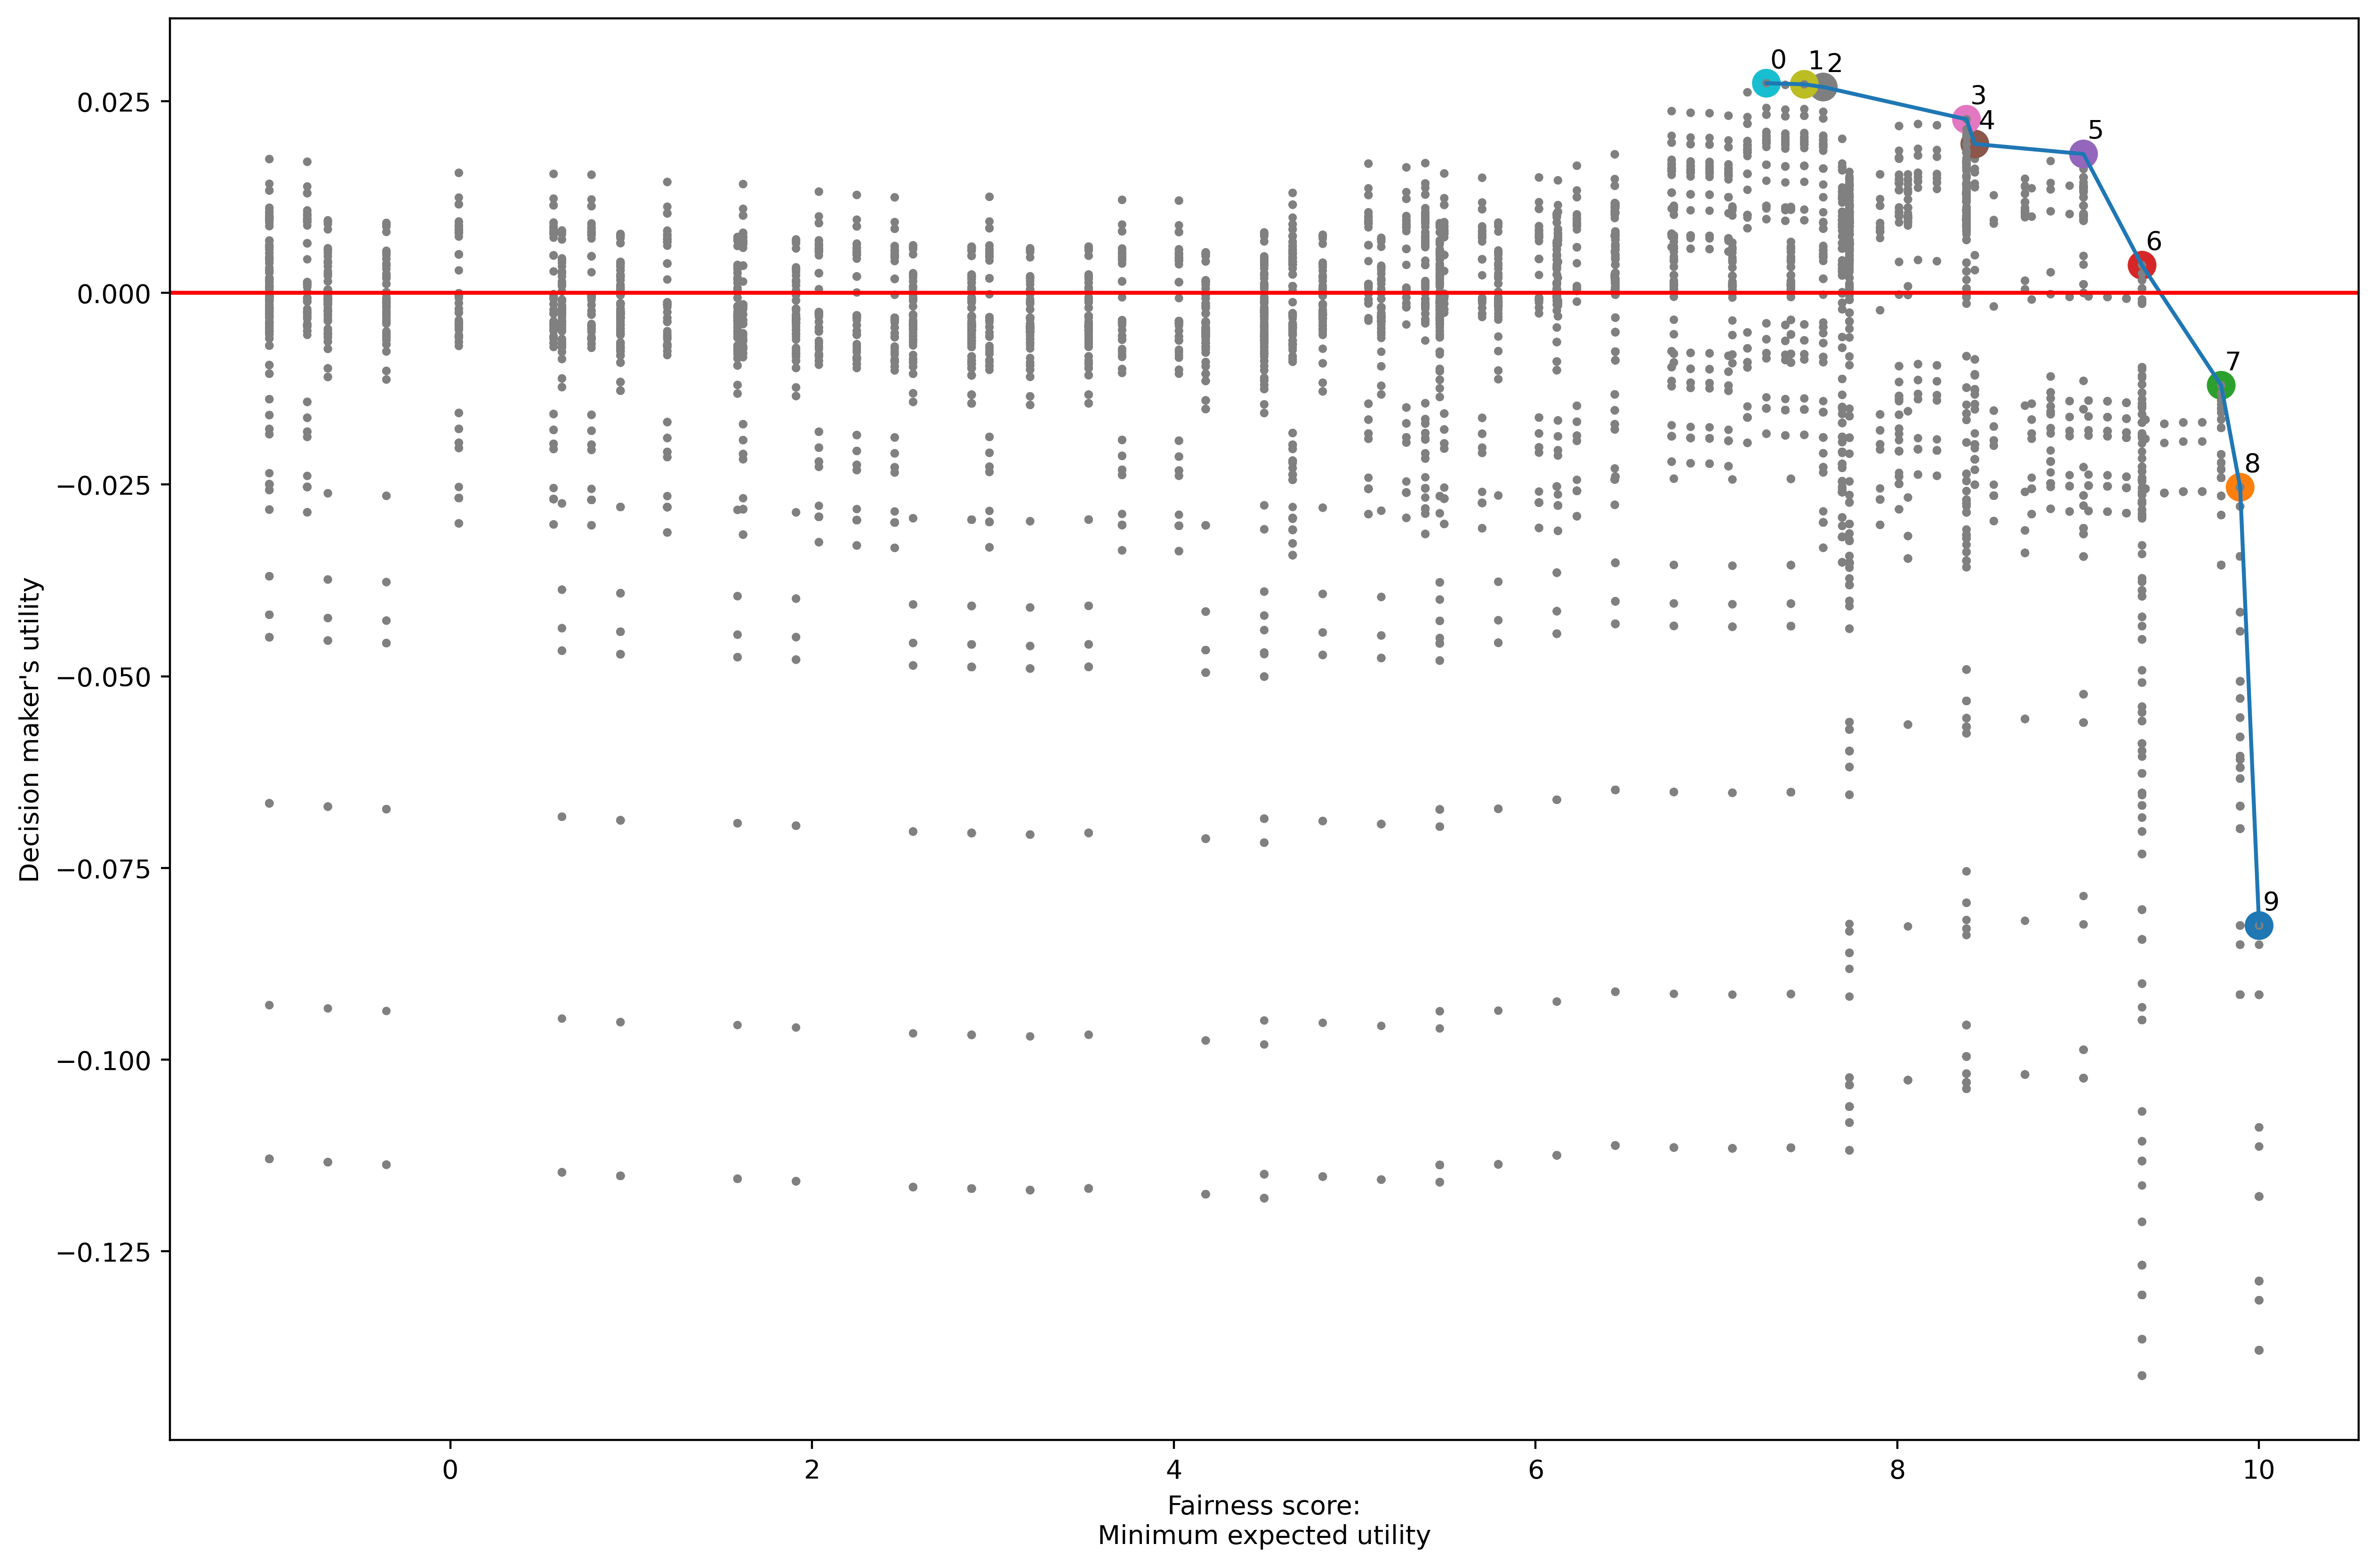

In [4]:
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["figure.dpi"] = 400
fig, ax = plt.subplots()
color_values = ['C'+str(list(pareto_front_indices).index(p)) if p in pareto_front_indices else 'grey' for p in range(len(U_DM))]
plt.plot(np.array(FS)[pareto_front_indices].tolist(), np.array(U_DM)[pareto_front_indices].tolist()) # visualize pareto front
sizes = [100 if c!='grey' else 5 for c in color_values]
ax.scatter(FS, U_DM, c=color_values, s=sizes)

# add numbers to all points lying on the pareto front
pareto_front_reverse = list(pareto_front_indices)
pareto_front_reverse.reverse()
for i, index in enumerate(pareto_front_reverse):
    ax.annotate(i, (FS[index]+0.02, U_DM[index]+0.002))

plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.ylabel('Decision maker\'s utility')
plt.xlabel(pattern_functions.get_xlabel())
plt.show()

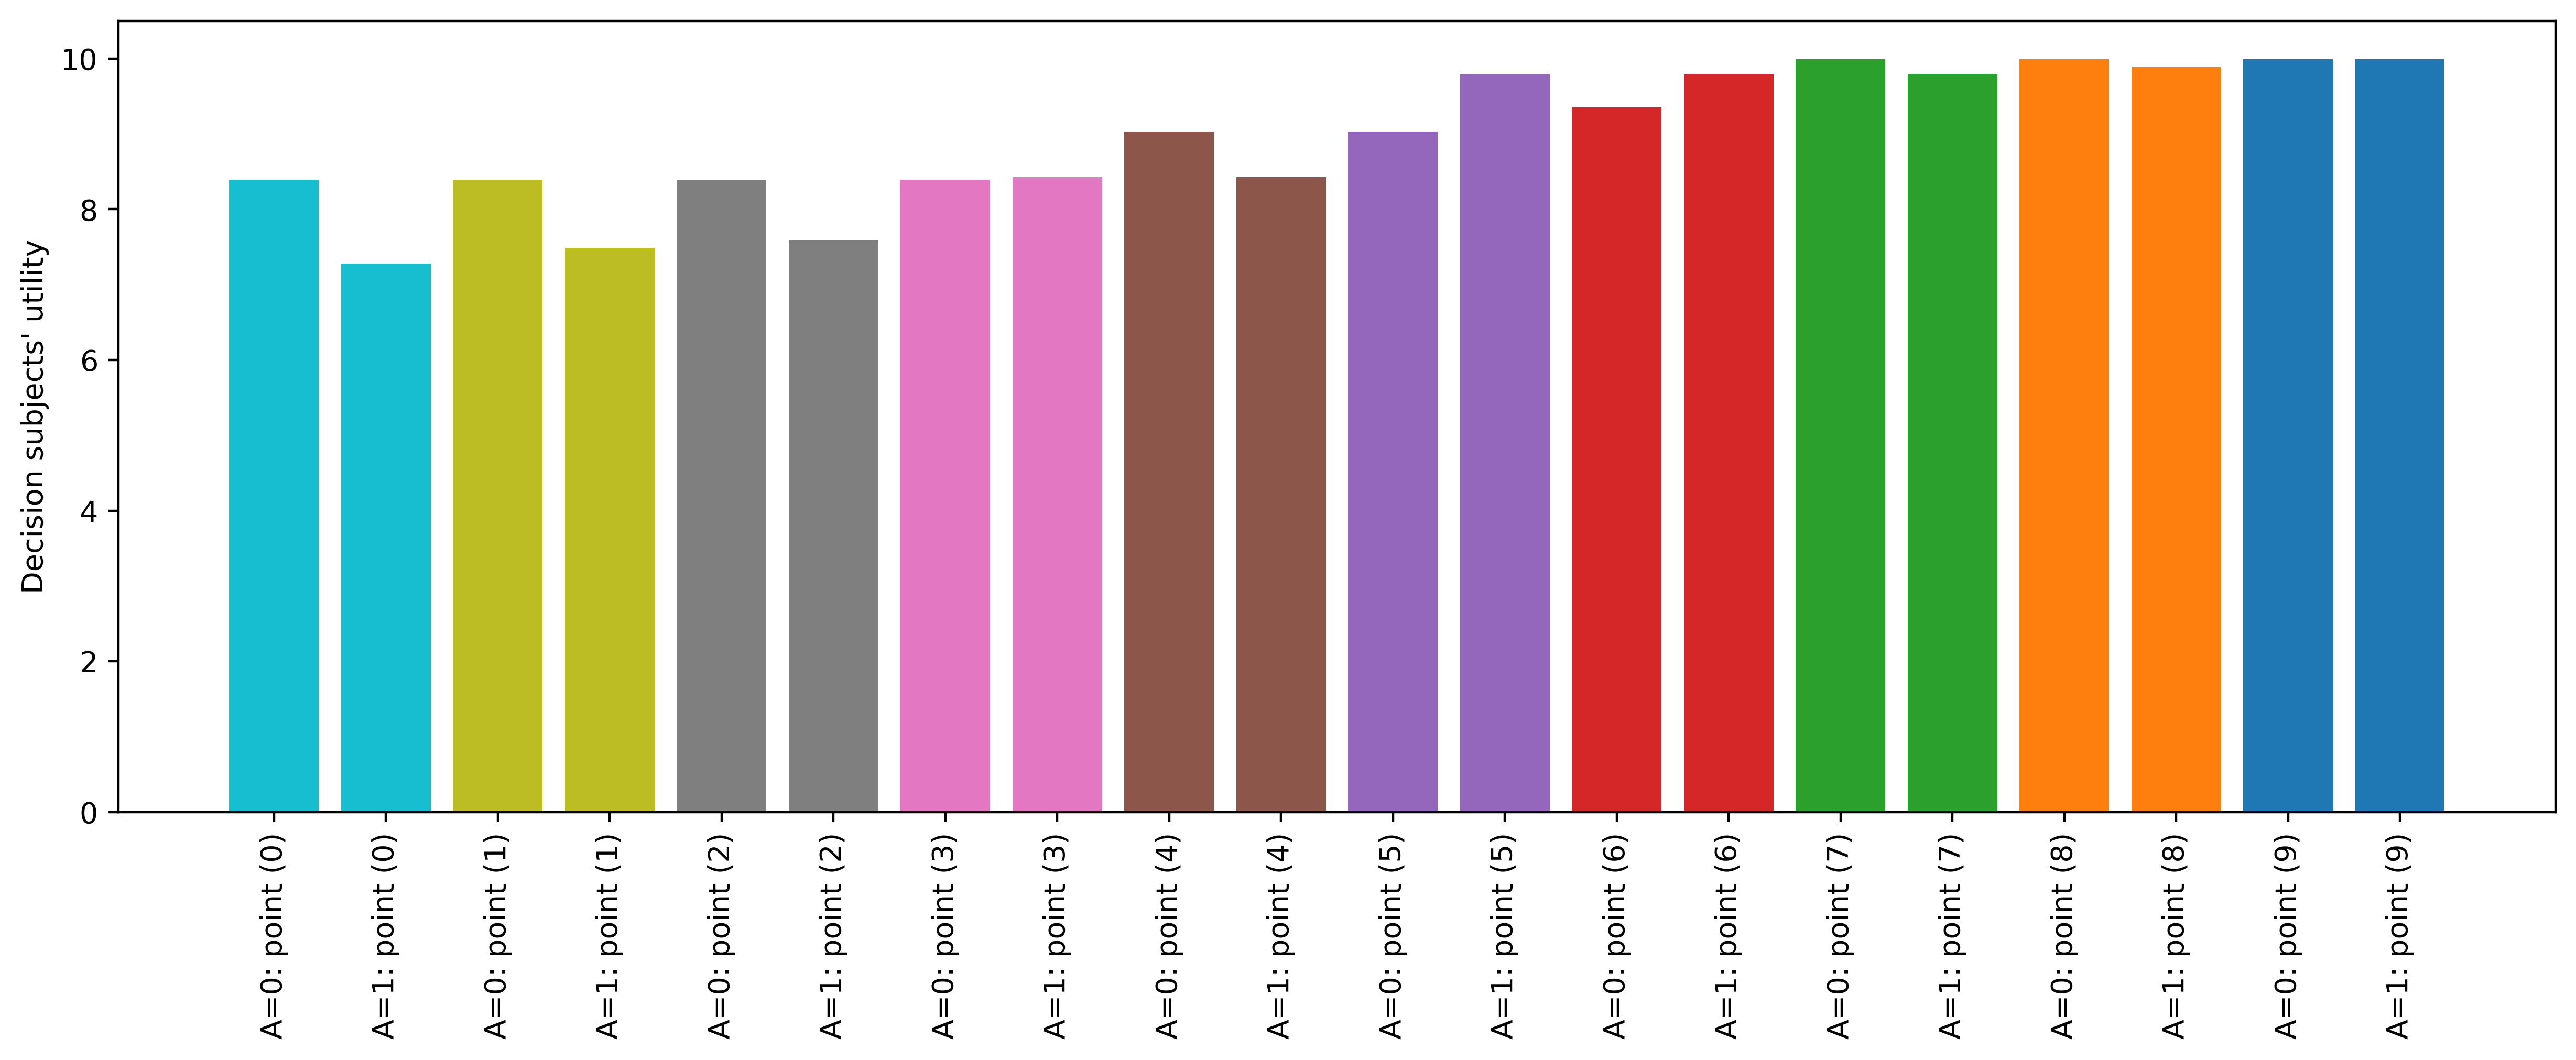

In [5]:
bar_y = []
bar_x = []
counter = 0
c = 0
colors = []
for i in pareto_front_reverse:
#     if counter == 0:
#         bar_x.append('A=0 (max fairness score)')
#         bar_x.append('A=1 (max fairness score)')
#     elif counter == pareto_front_size-1:
#         bar_x.append('A=0 (max decision maker utility)')
#         bar_x.append('A=1 (max decision maker utility)')
#     else:
    bar_x.append('A=0: point (' + str(counter) + ')')
    bar_x.append('A=1: point (' + str(counter) + ')')
    bar_y.append(U_DS_A0[i])
    bar_y.append(U_DS_A1[i])
    colors.append('C'+str(pareto_front_size - counter - 1))
    colors.append('C'+str(pareto_front_size - counter - 1))
    counter += 1
    
plt.rcParams["figure.figsize"] = (15,5)
plt.bar(bar_x, bar_y, color=colors, label=bar_x)
plt.xticks(rotation=90)
plt.ylabel('Decision subjects\' utility')
plt.show()